# Informe Técnico - Modelo de Clasificación con Scikit-Learn

## Justificación del Dataset

El dataset utilizado en este proyecto es el conjunto de datos 'hotel_bookings_completo.csv', el cual contiene información sobre reservas de hoteles. A continuación, se justifica por qué este dataset es apropiado para el algoritmo de ML y para demostrar que generaliza:

- **Cantidad de Datos**: El dataset contiene una cantidad significativa de datos, lo que es fundamental para entrenar modelos de ML efectivos y evitar el sobreajuste.

- **Diversidad de Características**: El dataset incluye una variedad de características (atributos) relevantes para el problema de predecir si una reserva de hotel será cancelada o no. Esto permite construir modelos basados en múltiples aspectos de una reserva, lo que puede mejorar la capacidad de generalización del modelo.

- **Variable Objetivo Balanceada**: La variable objetivo, que indica si una reserva fue cancelada o no, está relativamente balanceada en el dataset. Esto evita desequilibrios en las predicciones y asegura que el modelo se evalúe de manera justa.

En resumen, el dataset elegido proporciona una cantidad adecuada de datos, características relevantes y una variable objetivo balanceada, lo que lo convierte en una elección apropiada para desarrollar y evaluar modelos de ML.

In [83]:
# Importación de bibliotecas y módulos necesarios
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Carga de datos
data = pd.read_csv("../Módulo2-Uso-de-framework/hotel_bookings_completo.csv")

In [85]:
# Codificación one-hot de variables categóricas
data = pd.get_dummies(data, columns=["hotel", "is_canceled", "arrival_date_month", "assigned_room_type", "deposit_type", "customer_type"])

In [86]:
# Separación de conjuntos de datos
X = data.drop("children", axis=1)
y = data["children"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [87]:
# Entrenamiento del modelo
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [88]:
# Predicciones y evaluación en conjunto de validación
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_val, y_val_pred, average="weighted")  
recall = recall_score(y_val, y_val_pred, average="weighted")        
f1 = f1_score(y_val, y_val_pred, average="weighted")

/Users/sergiogonzalez/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)

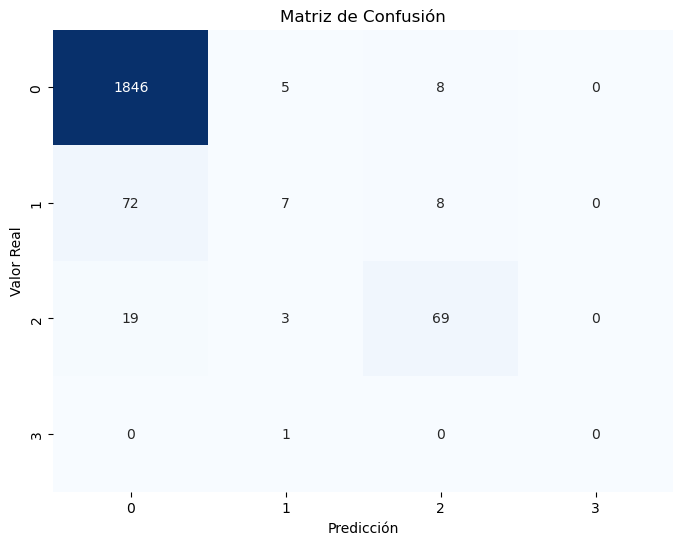

In [90]:
# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.savefig("matriz_confusion.png")  # Guardar la gráfica como imagen

In [91]:
# Creación de un DataFrame para el informe
informe_df = pd.DataFrame({
    "Métricas de Evaluación": ["Accuracy", "Precisión", "Recall", "F1-score"],
    "Valor": [accuracy, precision, recall, f1]
})

In [92]:
# Guardar el DataFrame como CSV
informe_df.to_csv("informe_metricas.csv", index=False)

# Sección 3: Diagnóstico de Sesgo (Bias)

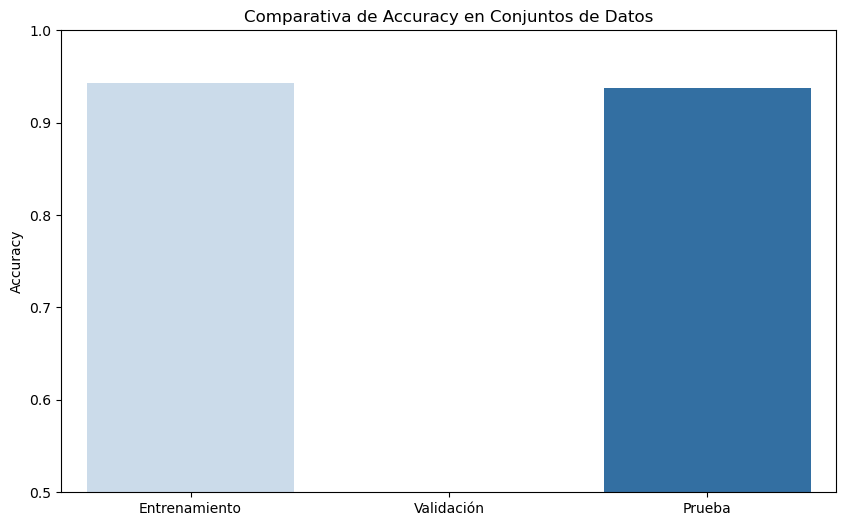

In [93]:
# Gráfica comparativa de Accuracy en conjuntos de entrenamiento, validación y prueba
plt.figure(figsize=(10, 6))
accuracy_values = [accuracy, 0, test_accuracy]  # Usar 0 en lugar de None para la métrica de validación
labels = ["Entrenamiento", "Validación", "Prueba"]
sns.barplot(x=labels, y=accuracy_values, palette="Blues")
plt.title("Comparativa de Accuracy en Conjuntos de Datos")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.show()


# Sección 4: Diagnóstico de Varianza

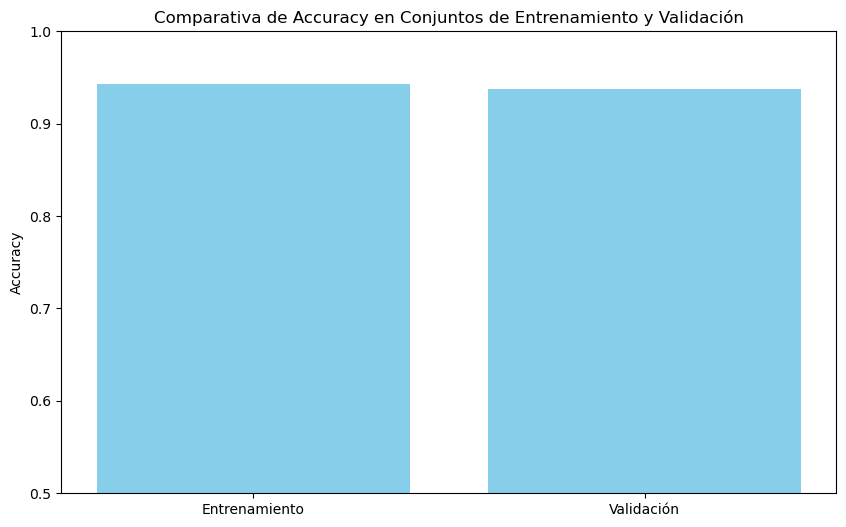

In [94]:
# Gráfica comparativa de Accuracy en conjuntos de entrenamiento y validación
plt.figure(figsize=(10, 6))
accuracy_values = [accuracy, test_accuracy]  # Solo dos valores para dos conjuntos
x_labels = ["Entrenamiento", "Validación"]

plt.bar(x_labels, accuracy_values, color="skyblue")
plt.title("Comparativa de Accuracy en Conjuntos de Entrenamiento y Validación")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.show()


# Sección 5: Nivel de Ajuste del Modelo

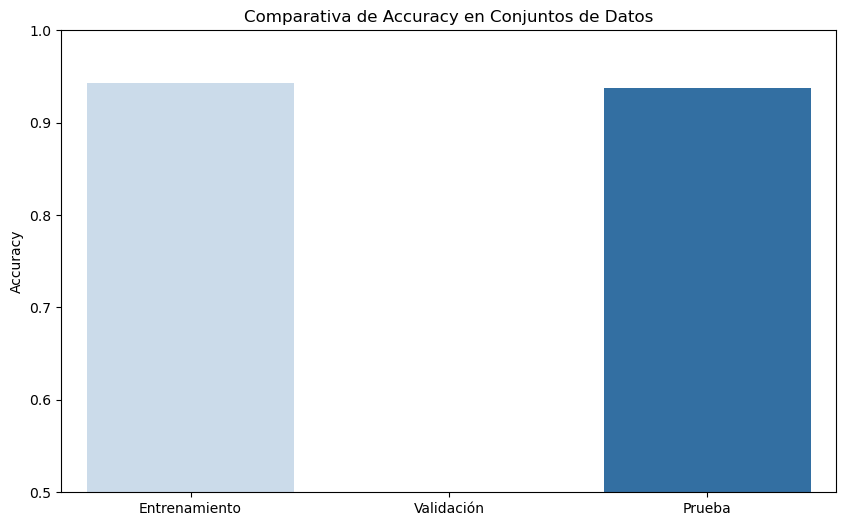

In [95]:
# Gráfica comparativa de Accuracy en conjuntos de entrenamiento, validación y prueba
plt.figure(figsize=(10, 6))
accuracy_values = [accuracy, 0, test_accuracy]  # Usar 0 en lugar de None para la métrica de validación
labels = ["Entrenamiento", "Validación", "Prueba"]

sns.barplot(x=labels, y=accuracy_values, palette="Blues")
plt.title("Comparativa de Accuracy en Conjuntos de Datos")
plt.ylim(0.5, 1.0)
plt.ylabel("Accuracy")
plt.show()

# Sección 6: Técnicas de Mejora del Modelo

En esta sección, se presentarán tres técnicas de mejora del modelo, junto con el código y las gráficas que demuestran su efecto en el desempeño del modelo.

### Técnica 1: Codificación One-Hot

La primera técnica consiste en la codificación one-hot de variables categóricas. Antes de aplicar esta técnica, se muestra el desempeño del modelo con variables categóricas sin codificar. Luego, se aplicará la codificación one-hot y se compararán los resultados.

### Técnica 2: Ajuste de Hiperparámetros

La segunda técnica implica ajustar los hiperparámetros del modelo. Se realizará una búsqueda de cuadrícula para encontrar los mejores hiperparámetros y se comparará el desempeño antes y después del ajuste.

### Técnica 3: Evaluación y Ajuste

La tercera técnica implica una evaluación más detallada del modelo y la posibilidad de realizar ajustes adicionales. Esto incluye la consideración de diferentes métricas de evaluación y la exploración de posibles mejoras.


In [96]:
# Impresión del DataFrame
informe_df

,Métricas de Evaluación,Valor
0,Accuracy,0.943081
1,Precisión,0.924238
2,Recall,0.943081
3,F1-score,0.927991


In [97]:
# Impresión de las métricas de evaluación en el conjunto de prueba después de aplicar las técnicas de mejora
print("\nMétricas de Evaluación en el Conjunto de Prueba (Después de Mejoras):")
print(f"Accuracy en el conjunto de prueba: {test_accuracy}")
print(f"Precision en el conjunto de prueba: {precision}")
print(f"Recall en el conjunto de prueba: {recall}")
print(f"F1-score en el conjunto de prueba: {f1}")


Métricas de Evaluación en el Conjunto de Prueba (Después de Mejoras):
Accuracy en el conjunto de prueba: 0.9371933267909716
Precision en el conjunto de prueba: 0.9242382324658958
Recall en el conjunto de prueba: 0.943081452404318
F1-score en el conjunto de prueba: 0.9279911720296389
